# TP Clustering 
### **Thomas Cotte et Rayane Makri**


Imports nécessaires pour le tp 

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import time

from scipy.io import arff

from sklearn import cluster
from sklearn import metrics

Fonctions pour charger les données et pour les visualiser

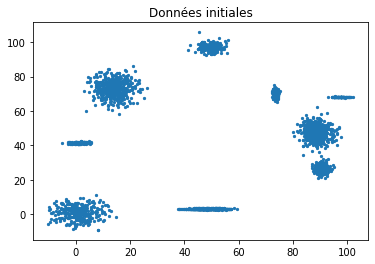

In [3]:
#chargement des données
def load_data(filename,relative_path="./artificial/"):
    databrut=arff.loadarff(open(relative_path+filename,'r'))
    data= [[x[0],x[1]] for x in databrut[0]]
    return np.array(data)

#visualisation des données intiales
def visualise_initial(data):
    plt.title("Données initiales")
    plt.scatter(data[:,0],data[:,1],s=5)
    plt.show()

def visualise_predict(data,pred):
    plt.title("Visualisation des clusters")
    plt.scatter(data[:,0],data[:,1],c=pred,s=5)
    plt.show()
    
#essaie avec le fichier "/2d-10c.arff"
data = load_data("/2d-10c.arff")
visualise_initial(data)

# Méthode K-Means


Méthode basé centres de masses.
On s'attend à une mauvais reconnaissance des clusters non convexes et à des bon temps d'éxécution.

## Clusters identifiable par la méthode K-Means

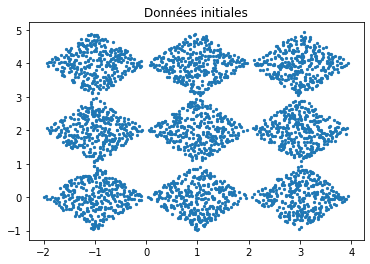

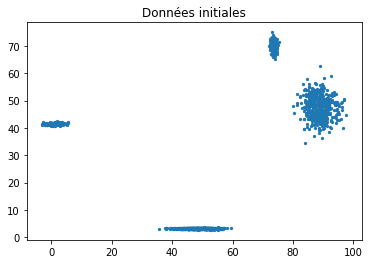

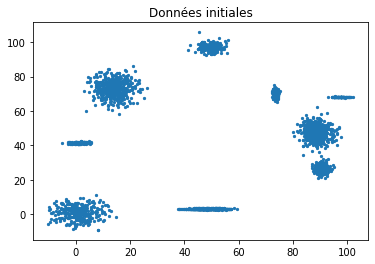

In [4]:
files_kmeans=["diamond9.arff","2d-4c.arff","2d-10c.arff"]
for file in files_kmeans:
    visualise_initial(load_data(file))

runtime =  59.62 ms


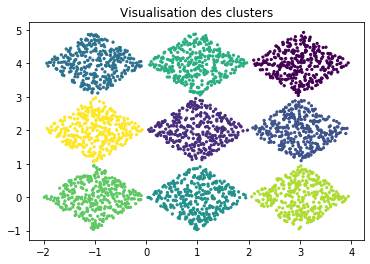

runtime =  17.95 ms


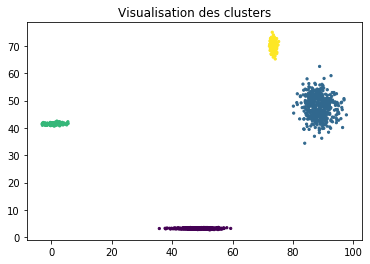

runtime =  34.89 ms


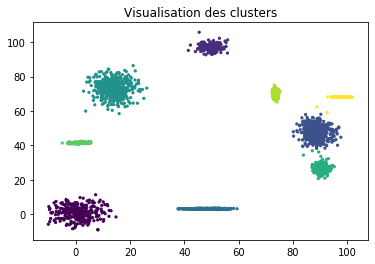

In [5]:
#nombre de cluster respectifs dans les fichiers données dans files_kmeans
n_clusters=[9,4,9]
for (file,clusters) in zip(files_kmeans,n_clusters):
    data=load_data(file)
    tps1 = time.time()
    pred=cluster.KMeans(n_clusters=clusters,init='k-means++').fit_predict(data)
    tps2 = time.time()
    print("runtime = ", round((tps2 - tps1)*1000,2),"ms")
    visualise_predict(data,pred)

## Métrique Silhouette pour trouver le nombre de clusters de k-means

In [6]:
#détermine le nombre de clusters grâce au coéfficient de silhouette
def sil_n_clusters(min,max,data):
    n_cluster=min
    best=-1
    for k in range(min,max+1,1):
        model = cluster.KMeans(n_clusters=k, init='k-means++').fit(data)
        silh = metrics.silhouette_score(data, model.labels_, metric='euclidean')
        if (best<silh):
            n_cluster = k
            best = silh
    return n_cluster

nb clusters = 9 , nb iter = 4 , runtime =  2492.29 ms


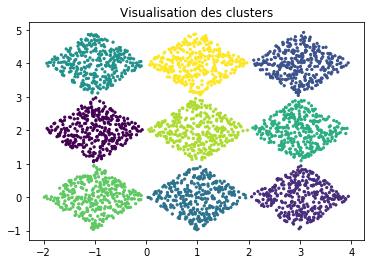

nb clusters = 4 , nb iter = 2 , runtime =  834.77 ms


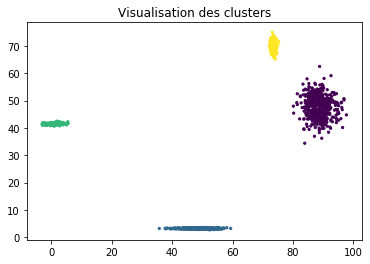

nb clusters = 9 , nb iter = 2 , runtime =  2120.33 ms


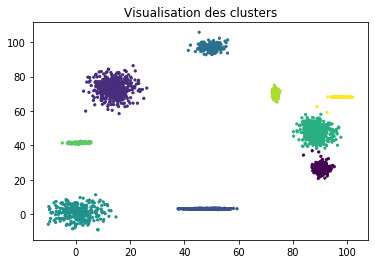

In [7]:
for file in files_kmeans:
    data=load_data(file)
    tps1 = time.time()
    n_clusters = sil_n_clusters(2,13,data)
    model = cluster.KMeans(n_clusters=n_clusters,init='k-means++').fit(data)
    tps2 = time.time()
    print("nb clusters =",n_clusters,", nb iter =",model.n_iter_, ", runtime = ", round((tps2 - tps1)*1000,2),"ms")
    visualise_predict(data,model.labels_)

## Métrique Score de Davies-Bouldin pour trouver le nombre de cluster de k-means


In [8]:
#détermine le nombre de clusters grâce au score de Davies-Bouldin
def davies_n_clusters(min,max,data):
    n_cluster = min
    #nombre arbitrairement haut 
    best = 1000000
    for k in range(min,max+1,1):
        model = cluster.KMeans(n_clusters=k,init='k-means++').fit(data)
        score = metrics.davies_bouldin_score(data, model.labels_)
        if score < best:
            best = score
            n_cluster = k
    return n_cluster

nb clusters = 9 , nb iter = 8 , runtime =  835.75 ms


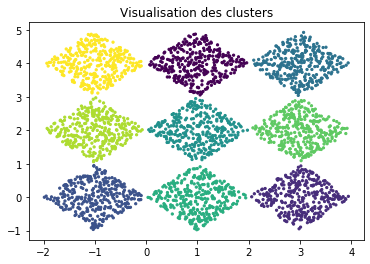

nb clusters = 4 , nb iter = 2 , runtime =  460.75 ms


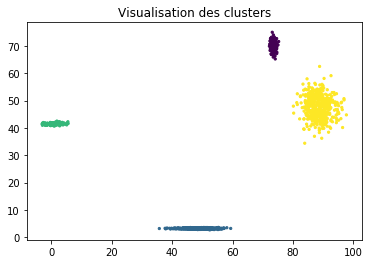

nb clusters = 9 , nb iter = 2 , runtime =  520.61 ms


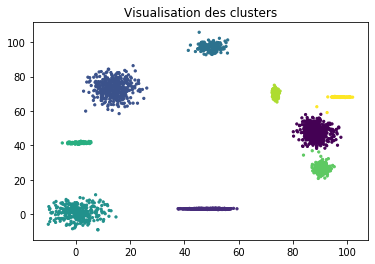

In [9]:
for file in files_kmeans:
    data=load_data(file)
    tps1 = time.time()
    n_clusters = davies_n_clusters(2,13,data)
    model = cluster.KMeans(n_clusters=n_clusters,init='k-means++').fit(data)
    tps2 = time.time()
    print("nb clusters =",n_clusters,", nb iter =",model.n_iter_, ", runtime = ", round((tps2 - tps1)*1000,2),"ms")
    visualise_predict(data,model.labels_)

## Clusters difficilement identifiable par la méthode K-Means

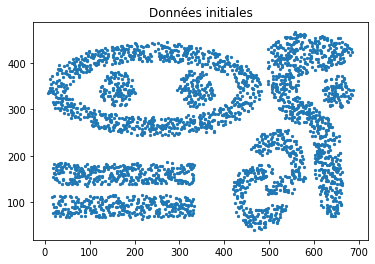

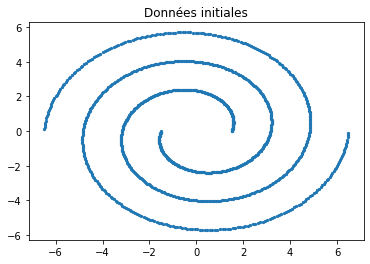

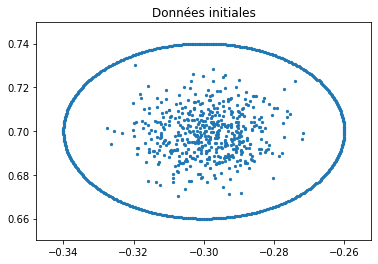

In [10]:
bad_kmeans=["complex9.arff","spiral.arff","donut2.arff"]
for file in bad_kmeans:
    visualise_initial(load_data(file))

## En donnant le nombre de clusters

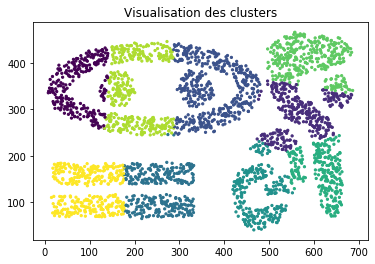

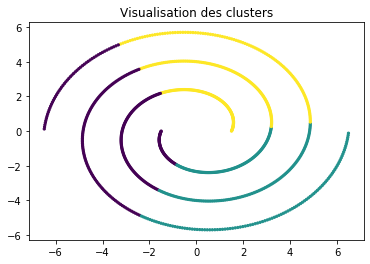

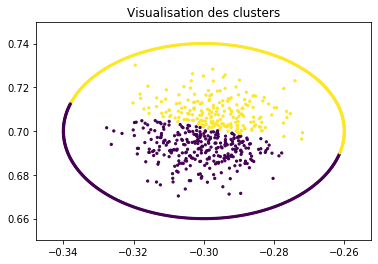

In [11]:
#nombre de cluster respectifs dans les fichiers données dans files_kmeans
n_clusters=[9,3,2,3]
for (file,clusters) in zip(bad_kmeans,n_clusters):
    data=load_data(file)
    pred=cluster.KMeans(n_clusters=clusters,init='k-means++').fit_predict(data)
    visualise_predict(data,pred)

### En utilisant la métrique silhouette pour déterminer le nombre de clusters

nb clusters = 2 , nb iter = 3 , runtime =  2924.13 ms


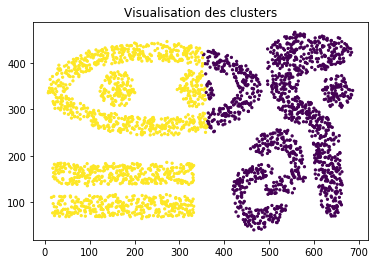

nb clusters = 12 , nb iter = 45 , runtime =  1308.46 ms


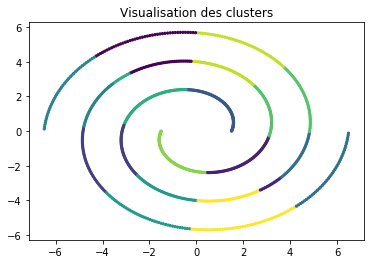

nb clusters = 6 , nb iter = 12 , runtime =  983.37 ms


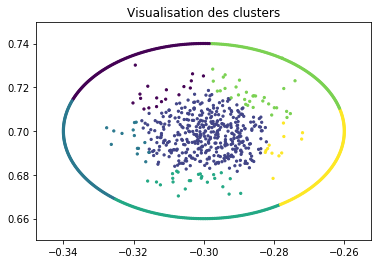

In [12]:
for file in bad_kmeans:
    data=load_data(file)
    tps1 = time.time()
    n_clusters = sil_n_clusters(2,13,data)
    model = cluster.KMeans(n_clusters=n_clusters,init='k-means++').fit(data)
    tps2 = time.time()
    print("nb clusters =",n_clusters,", nb iter =",model.n_iter_, ", runtime = ", round((tps2 - tps1)*1000,2),"ms")
    visualise_predict(data,model.labels_)

### En utilisant le score de Davies-Bouldin pour déterminer le nombre de clusters


nb clusters = 6 , nb iter = 8 , runtime =  1119.97 ms


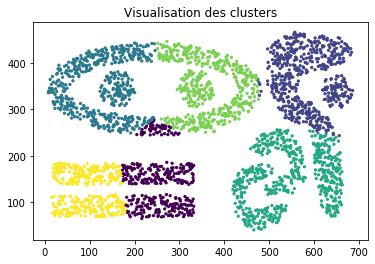

nb clusters = 13 , nb iter = 42 , runtime =  940.44 ms


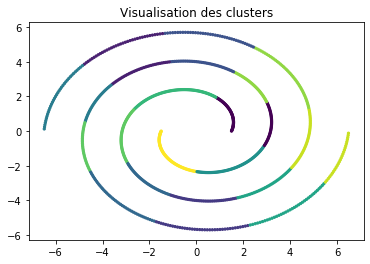

nb clusters = 13 , nb iter = 17 , runtime =  776.89 ms


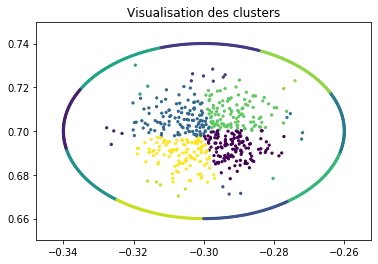

In [13]:
for file in bad_kmeans:
    data=load_data(file)
    tps1 = time.time()
    n_clusters = davies_n_clusters(2,13,data)
    model = cluster.KMeans(n_clusters=n_clusters,init='k-means++').fit(data)
    tps2 = time.time()
    print("nb clusters =",n_clusters,", nb iter =",model.n_iter_, ", runtime = ", round((tps2 - tps1)*1000,2),"ms")
    visualise_predict(data,model.labels_)

# Méthode de Clustering Agglomératif

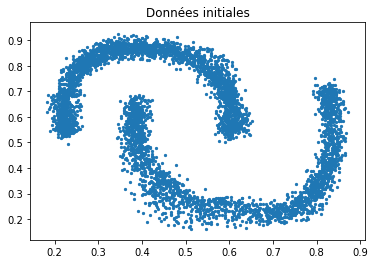

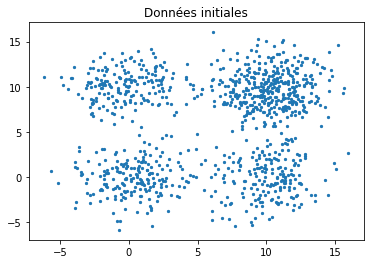

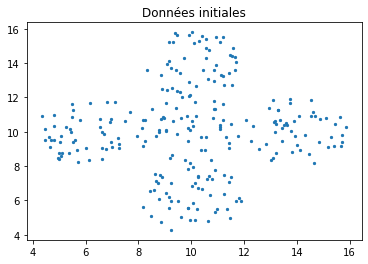

In [14]:
#respectivement : fichier marchant bien pour linkage de type: single, average, complete, et ward
files_aglo=["banana.arff","sizes1.arff","spherical_5_2.arff"]
for file in files_aglo:
    data=load_data(file)
    visualise_initial(data)

## Linkage Single (marche dense pas forcément convexes et est relativement mauvais pour les autres types de clusters)

runtime =  178.97 ms


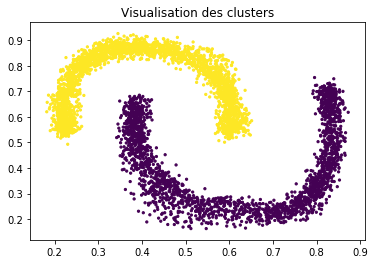

runtime =  6.98 ms


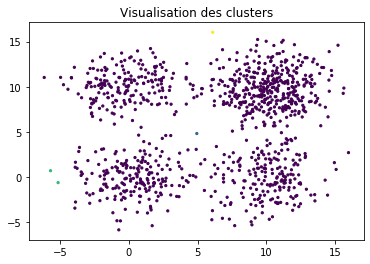

runtime =  1.0 ms


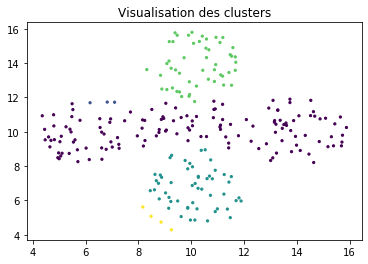

In [15]:
#nombre de cluster respectifs dans les fichiers données dans files_aglo
n_clusters=[2,4,5]
for (file,clusters) in zip(files_aglo,n_clusters):
    data=load_data(file)
    tps1=time.time()
    pred=cluster.AgglomerativeClustering(n_clusters=clusters,linkage='single').fit_predict(data)
    tps2=time.time()
    print("runtime = ", round((tps2 - tps1)*1000,2),"ms")
    visualise_predict(data,pred)

## Linkage average (bon pour clusters convexes, mauvais sinon)

runtime =  342.09 ms


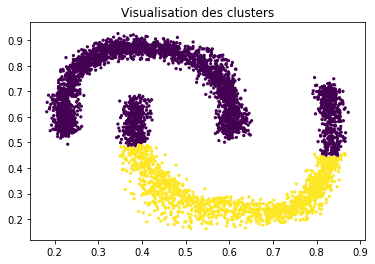

runtime =  16.0 ms


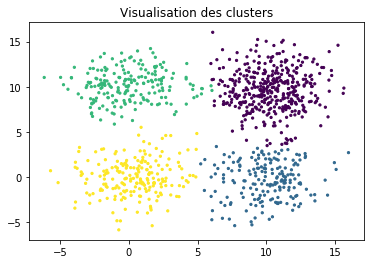

runtime =  1.96 ms


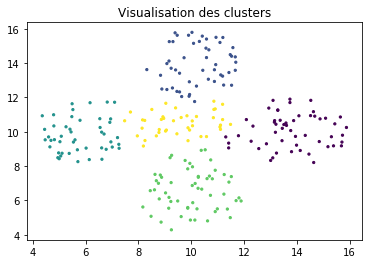

In [16]:
for (file,clusters) in zip(files_aglo,n_clusters):
    data=load_data(file)
    tps1=time.time()
    pred=cluster.AgglomerativeClustering(n_clusters=clusters,linkage='average').fit_predict(data)
    tps2=time.time()
    print("runtime = ", round((tps2 - tps1)*1000,2),"ms")
    visualise_predict(data,pred)

## Linkage Complete (moyennement bon pour cluster convexe, mauvais si non convexe)

runtime =  314.16 ms


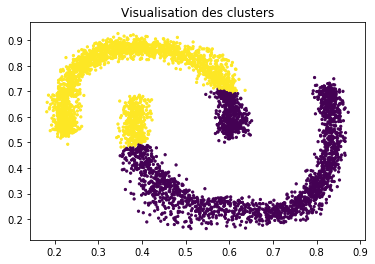

runtime =  16.97 ms


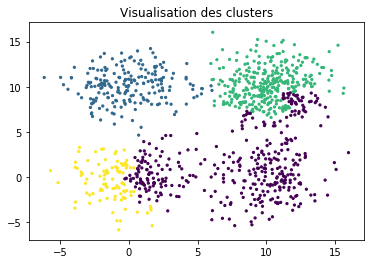

runtime =  1.03 ms


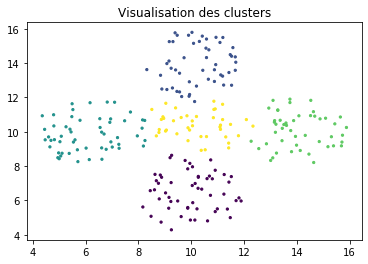

In [17]:
for (file,clusters) in zip(files_aglo,n_clusters):
    data=load_data(file)
    tps1 = time.time()
    pred=cluster.AgglomerativeClustering(n_clusters=clusters,linkage='complete').fit_predict(data)
    tps2 = time.time()
    print("runtime = ", round((tps2 - tps1)*1000,2),"ms")
    visualise_predict(data,pred)

## Linkage ward (très bon si cluster convexe, mauvais sinon)

runtime =  392.95 ms


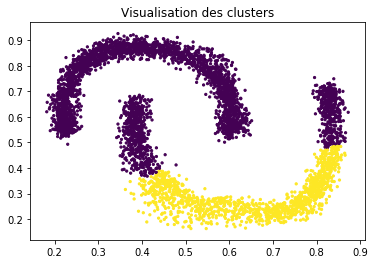

runtime =  17.95 ms


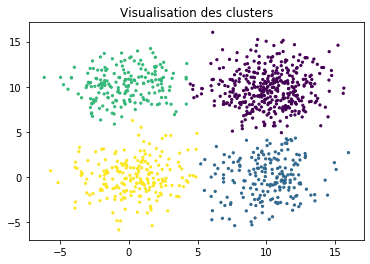

runtime =  1.99 ms


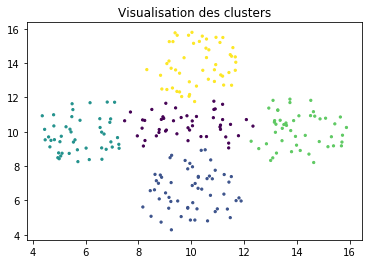

In [18]:
for (file,clusters) in zip(files_aglo,n_clusters):
    data=load_data(file)
    tps1 = time.time()
    pred=cluster.AgglomerativeClustering(n_clusters=clusters,linkage='ward').fit_predict(data)
    tps2 = time.time()
    print("runtime = ", round((tps2 - tps1)*1000,2),"ms")
    visualise_predict(data,pred)

## Détermination du nombre de cluster et temps de calcul

## Détermination du nombre de cluster en fonction du coéfficient de silhouette (meilleur pour clusters convexes)


In [19]:
def sil_n_clusters_agg(min,max,data):
    n_cluster=min
    best=-1
    for k in range(min,max+1,1):
        model = cluster.AgglomerativeClustering(n_clusters=k, linkage='ward').fit(data)
        silh = metrics.silhouette_score(data, model.labels_, metric='euclidean')
        if (best<silh):
            n_cluster = k
            best = silh
    return n_cluster

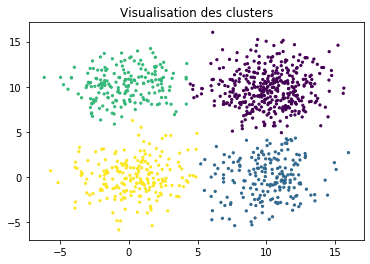

runtime =  321.14 ms
4


In [20]:
data=load_data(files_aglo[1])
tps1=time.time()
clusters=sil_n_clusters_agg(2,9,data)
pred=cluster.AgglomerativeClustering(n_clusters=clusters, linkage='ward').fit_predict(data)
tps2=time.time()
visualise_predict(data,pred)
print("runtime = ", round((tps2 - tps1)*1000,2),"ms")
print(clusters)
## retourne le bon nombre

## Détermination du nombre de cluster en fonction de l'indice de Davies-Bouldin (meilleur pour clusters convexes)

In [21]:
#détermine le nombre de clusters grâce au score de Davies-Bouldin
def davies_n_clusters(min,max,data):
    n_cluster = min
    #nombre arbitrairement haut 
    best = 1000000
    for k in range(min,max+1,1):
        model = cluster.AgglomerativeClustering(n_clusters=k, linkage='ward').fit(data)
        score = metrics.davies_bouldin_score(data, model.labels_)
        if score < best:
            best = score
            n_cluster = k
    return n_cluster

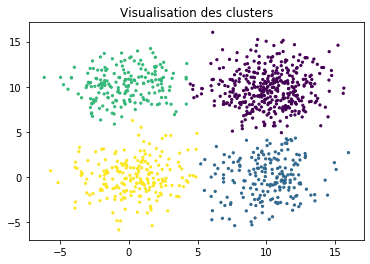

runtime =  299.2 ms
4


In [22]:
data=load_data(files_aglo[1])
tps1=time.time()
clusters=sil_n_clusters_agg(2,9,data)
pred=cluster.AgglomerativeClustering(n_clusters=clusters, linkage='ward').fit_predict(data)
tps2=time.time()
visualise_predict(data,pred)
print("runtime = ", round((tps2 - tps1)*1000,2),"ms")
print(clusters)
##retourne le bon nombre

## Détermination du nombre de cluster en fonction de l'indice CDbw (meilleur pour cluster basé sur leur densité)

In [23]:
from cdbw import CDbw
def cdbw_n_clusters_agg(min,max,data):
    n_cluster=min
    best=-1
    for k in range(min,max+1,1):
        model = cluster.AgglomerativeClustering(n_clusters=k, linkage='single').fit(data)
        cdbw = CDbw(data, model.labels_, metric="euclidean", alg_noise='comb',intra_dens_inf=False, s=3, multipliers=False)
        if (best<cdbw):
            n_cluster = k
            best = cdbw
    return n_cluster

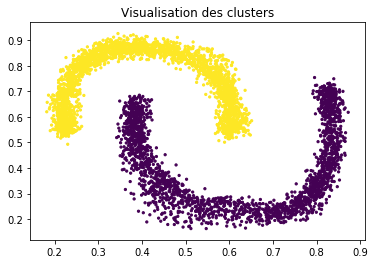

runtime =  1446.21 ms
2


In [24]:
data=load_data(files_aglo[0])
tps1=time.time()
clusters=cdbw_n_clusters_agg(2,9,data)
pred=cluster.AgglomerativeClustering(n_clusters=clusters, linkage='single').fit_predict(data)
tps2=time.time()
visualise_predict(data,pred)
print("runtime = ", round((tps2 - tps1)*1000,2),"ms")
print(clusters)
## retourne le bon nombre

# Méthode Clustering DBSCAN

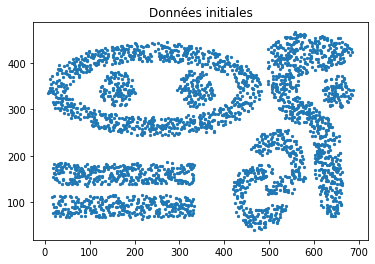

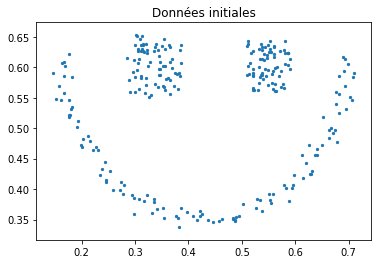

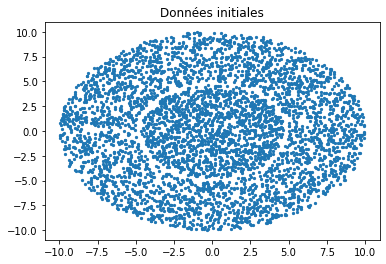

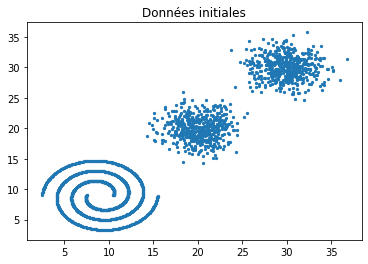

In [147]:
#mauvais file ds2c2sc13.arff
files_db=["complex9.arff","zelnik3.arff","disk-4500n.arff","2sp2glob.arff"]
for file in files_db:
    data=load_data(file)
    visualise_initial(data)

## Détermination du paramètre epsilon

On se propose d'utiliser la valeur de défaut de minpts=4 pour les données à 2 dimensions et d'utiliser nearest neighbors ppour calculer la distance moyenne enter chaque point et ses n voisins les plus proches afin de déterminer une valeur approprié pour epsilon

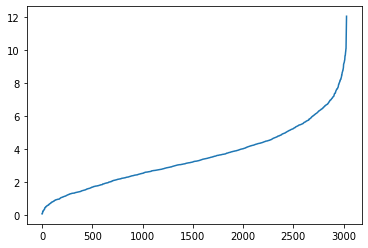

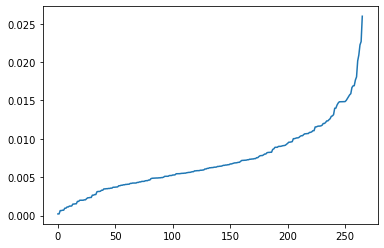

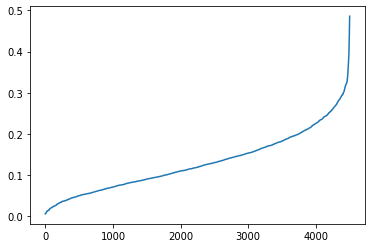

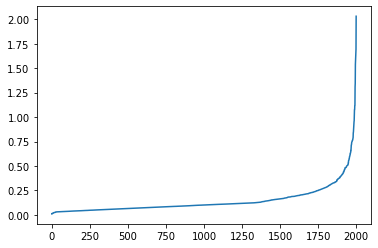

In [148]:
from sklearn.neighbors import NearestNeighbors

def det_eps(data):
    neighbors=NearestNeighbors(n_neighbors=4)
    neighbors_fit=neighbors.fit(data)
    distances, indices = neighbors_fit.kneighbors(data)
    distances = np.sort(distances, axis=0)
    distances = distances[:,1]
    plt.plot(distances)
    plt.show()

for file in files_db:
    data=load_data(file)
    det_eps(data)

runtime =  15.01 ms


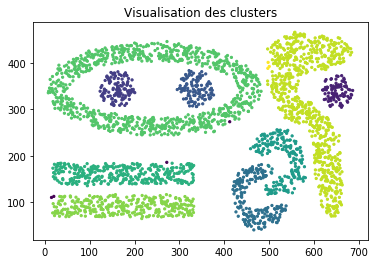

runtime =  1.96 ms


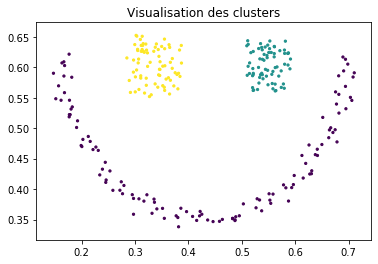

runtime =  20.99 ms


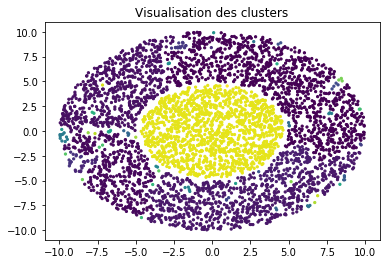

runtime =  14.96 ms


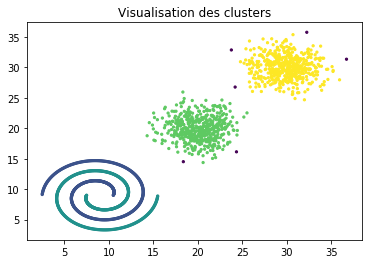

In [149]:
data=load_data(files_db[0])
tps1=time.time()
pred=cluster.DBSCAN(eps=11, min_samples=3).fit_predict(data)
tps2=time.time()
print("runtime = ", round((tps2 - tps1)*1000,2),"ms")
visualise_predict(data,pred)

data=load_data(files_db[1])
tps1=time.time()
pred=cluster.DBSCAN(eps=0.03, min_samples=2).fit_predict(data)
tps2=time.time()
print("runtime = ", round((tps2 - tps1)*1000,2),"ms")
visualise_predict(data,pred)


data=load_data(files_db[2])
tps1=time.time()
pred=cluster.DBSCAN(eps=0.365, min_samples=1).fit_predict(data)
tps2=time.time()
print("runtime = ", round((tps2 - tps1)*1000,2),"ms")
visualise_predict(data,pred)

data=load_data(files_db[3])
tps1=time.time()
pred=cluster.DBSCAN(eps=1.5, min_samples=3).fit_predict(data)
tps2=time.time()
print("runtime = ", round((tps2 - tps1)*1000,2),"ms")
visualise_predict(data,pred)

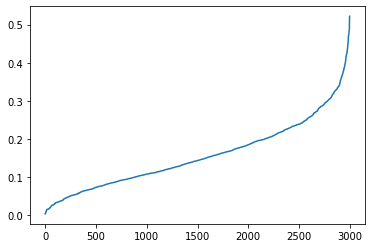

In [399]:
## jeu de donnée comportant 2 clusters proches ayant une différence de densité
data=load_data("disk-3000n.arff")
det_eps(data)

runtime =  13.96 ms


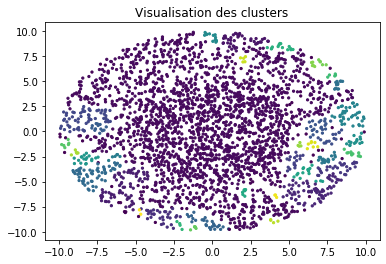

In [406]:
data=load_data("disk-3000n.arff")
tps1=time.time()
pred=cluster.DBSCAN(eps=0.45, min_samples=4).fit_predict(data)
tps2=time.time()
print("runtime = ", round((tps2 - tps1)*1000,2),"ms")
visualise_predict(data,pred)

## Méthode Clustering HDBSCAN

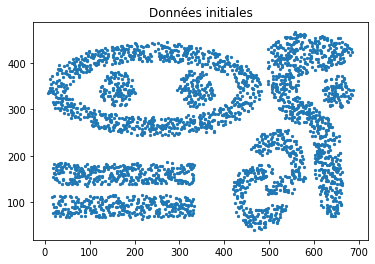

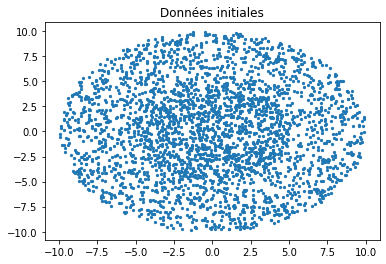

In [407]:
import hdbscan

files_hdb=["complex9.arff","disk-3000n.arff"]

for file in files_hdb:
    data=load_data(file)
    visualise_initial(data)

runtime =  73.8 ms


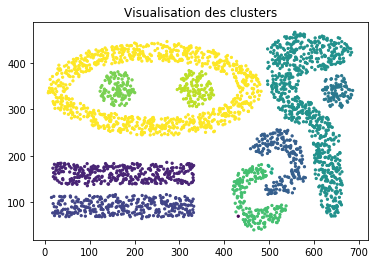

runtime =  59.84 ms


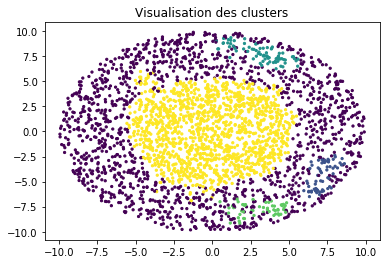

In [438]:
data=load_data(files_hdb[0])
tps1 = time.time()
pred = hdbscan.HDBSCAN(min_cluster_size=2, cluster_selection_epsilon=12).fit_predict(data)
tps2 = time.time()
print("runtime = ", round((tps2 - tps1)*1000,2),"ms")

visualise_predict(data,pred)

data=load_data(files_hdb[1])
tps1 = time.time()
pred = hdbscan.HDBSCAN(min_cluster_size=55,min_samples=32,cluster_selection_epsilon=0.1).fit_predict(data)
tps2 = time.time()
print("runtime = ", round((tps2 - tps1)*1000,2),"ms")
visualise_predict(data,pred)